# **Análise Exploratória da Base de Dados Iris**
**Objetivo:** Este notebook visa explorar e analisar o famoso conjunto de dados Iris. A base de dados Iris é um conjunto padrão frequentemente usado em aprendizado de máquina e estatísticas, servindo como um primeiro passo para muitos entusiastas e profissionais na área.

**Contexto:** A base foi introduzida pelo biólogo Ronald Fisher em 1936 e consiste em 150 observações de flores Iris de três espécies diferentes: setosa, versicolour e virginica. Cada observação contém quatro medidas (em cm) relacionadas às flores:

Comprimento da Sépala

Largura da Sépala

Comprimento da Pétala

Largura da Pétala

**Meta:** Através desta análise, buscaremos entender as características distintas de cada espécie e como essas características se relacionam entre si. Também aplicaremos técnicas básicas de aprendizado de máquina para classificar as flores com base nessas características.

In [1]:
# Importando as bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Carregando a base de dados Iris
iris = datasets.load_iris()
X = iris.data[:, 2:]  # Usando apenas comprimento da pétala e largura da pétala
y = iris.target

# Dividindo a base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das características (importante para algoritmos baseados em distância)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predizendo os rótulos para o conjunto de teste
y_pred = knn.predict(X_test)

# Mostrando os resultados
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



1. Visualização dos Dados
A visualização é fundamental para entender a natureza dos dados. Aqui, vamos plotar os pontos considerando o comprimento e largura da pétala.

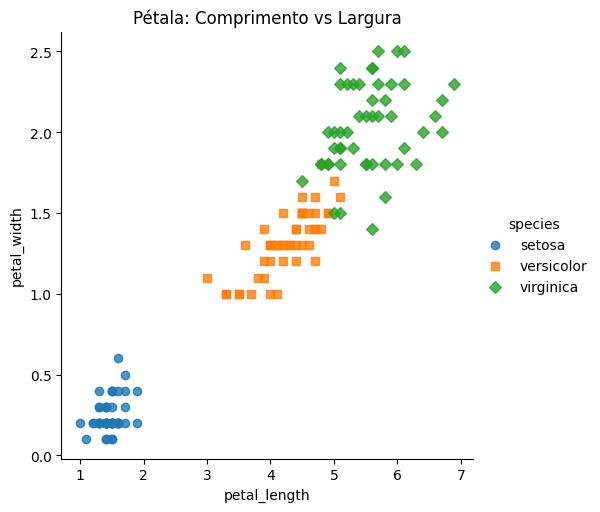

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset Iris usando seaborn
iris_data = sns.load_dataset('iris')

# Plot usando seaborn
sns.lmplot(x="petal_length", y="petal_width", data=iris_data, hue='species', fit_reg=False, markers=["o", "s", "D"])
plt.title('Pétala: Comprimento vs Largura')
plt.show()


2. Modelos Diferentes
O KNN é apenas um dos muitos algoritmos disponíveis. Podemos tentar, por exemplo, uma máquina de vetores de suporte (SVM) ou uma árvore de decisão.

2.1 SVM:

In [3]:
from sklearn.svm import SVC

# Usando as mesmas divisões de treino e teste
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



2.2 Árvore de Decisão:

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



3. Ajuste de Hiperparâmetros
Muitos modelos possuem hiperparâmetros que podem ser ajustados. Usando validação cruzada juntamente com uma busca em grade (grid search), você pode encontrar os melhores hiperparâmetros para o seu modelo.

Por exemplo, para o KNN:

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 15))}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)


{'n_neighbors': 3}
0.95


Histogramas e KDE (Kernel Density Estimation)
Essas visualizações fornecem uma ideia da distribuição de uma única variável. Com elas, você pode visualizar rapidamente a frequência de diferentes intervalos de valores.

<ipython-input-6-561e3f35ee68>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data["petal_length"], bins=20, kde=True)


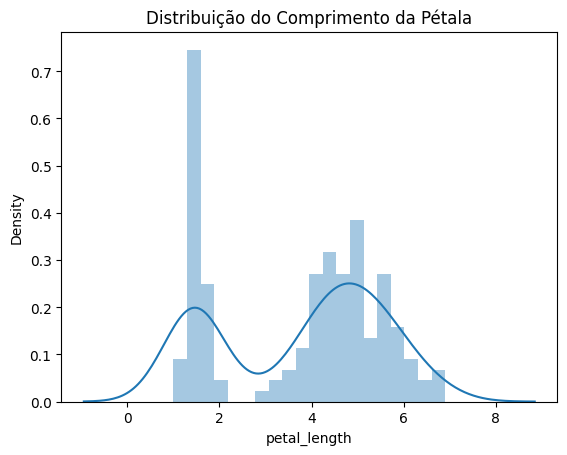

In [6]:
sns.distplot(iris_data["petal_length"], bins=20, kde=True)
plt.title('Distribuição do Comprimento da Pétala')
plt.show()


2. Boxplots
Boxplots são úteis para visualizar a distribuição e detectar outliers.

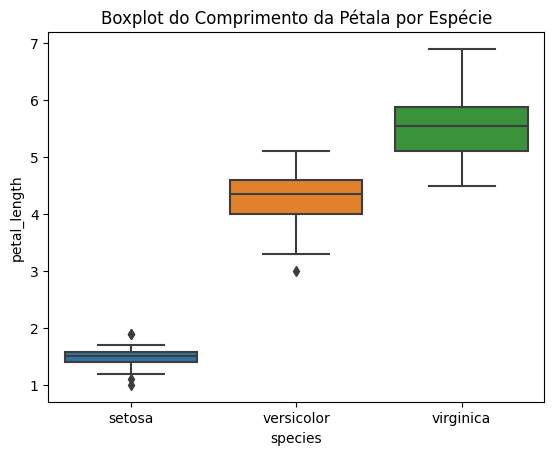

In [7]:
sns.boxplot(x="species", y="petal_length", data=iris_data)
plt.title('Boxplot do Comprimento da Pétala por Espécie')
plt.show()


3. Violin plots
É uma combinação de boxplot com KDE. Ele mostra a distribuição dos dados e sua densidade de probabilidade.

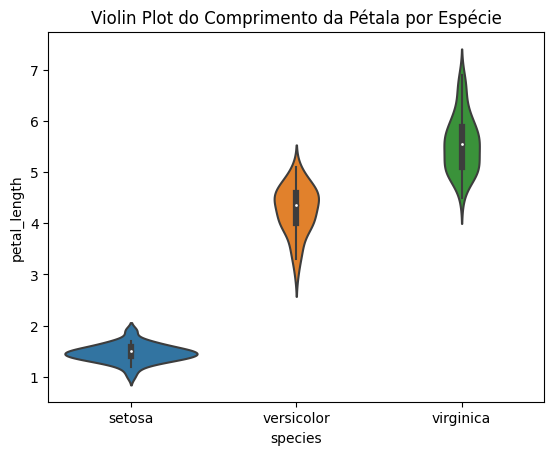

In [8]:
sns.violinplot(x="species", y="petal_length", data=iris_data)
plt.title('Violin Plot do Comprimento da Pétala por Espécie')
plt.show()


4. Pair plots (scatter matrix)
Essa é uma excelente visualização quando você quer ver a relação entre múltiplas variáveis.

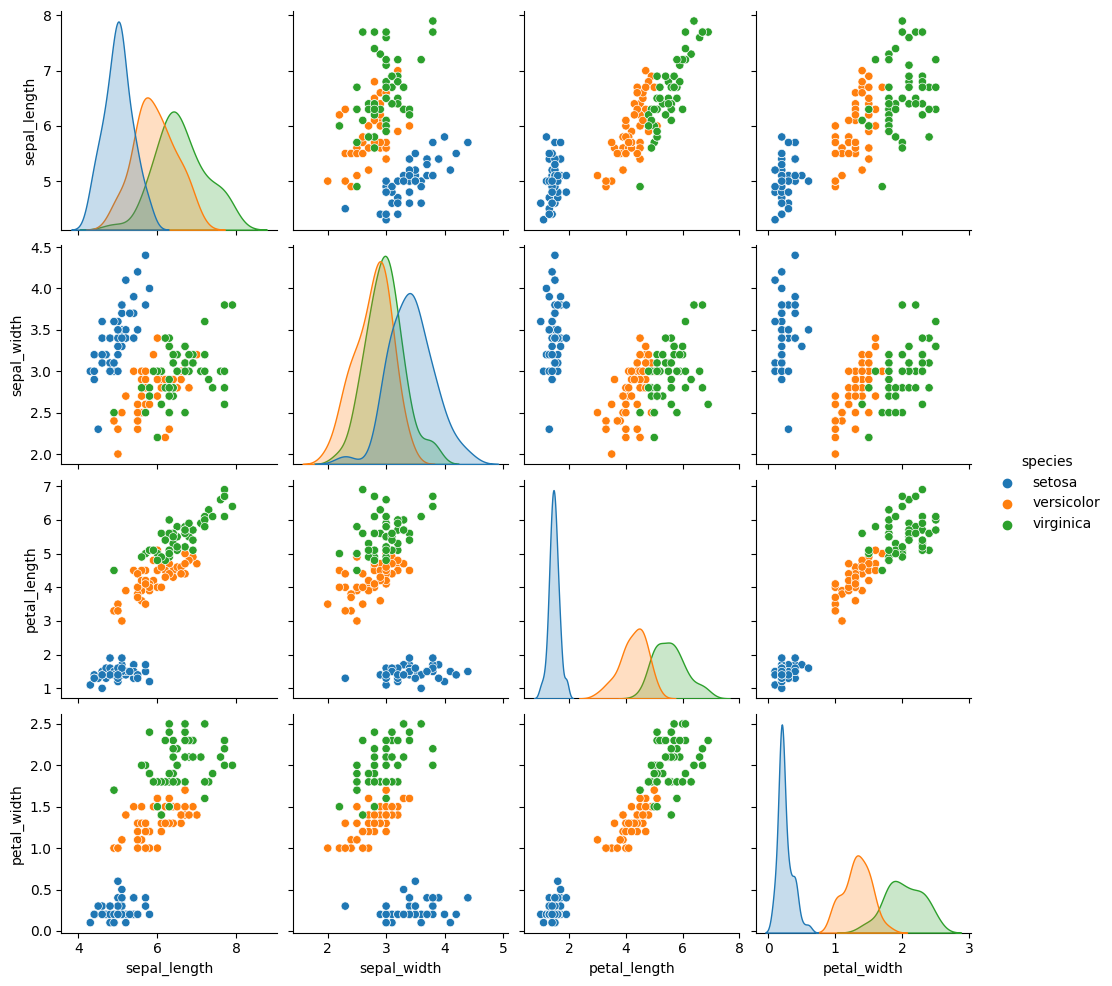

In [9]:
sns.pairplot(iris_data, hue="species")
plt.show()


In [ ]:
5. Correlation Heatmap
Um heatmap de correlação pode ajudá-lo a visualizar correlações entre diferentes variáveis.

<ipython-input-10-104aa97d26ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_data.corr()


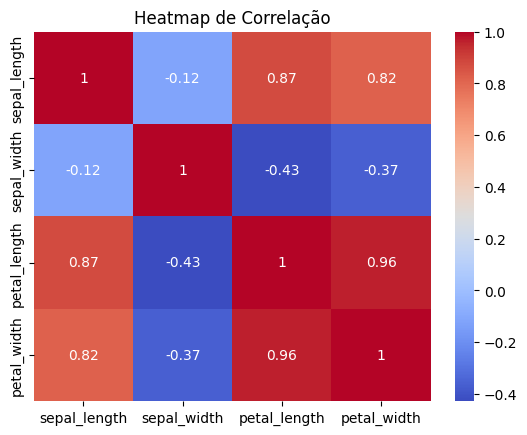

In [10]:
correlation_matrix = iris_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()


3D Scatter Plots
Se você quer visualizar a relação entre três variáveis, um scatter plot 3D pode ser útil.



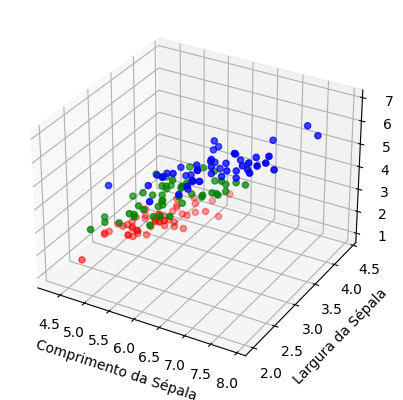

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}
ax.scatter(iris_data["sepal_length"], iris_data["sepal_width"], iris_data["petal_length"], c=iris_data["species"].apply(lambda x: colors[x]))
ax.set_xlabel('Comprimento da Sépala')
ax.set_ylabel('Largura da Sépala')
ax.set_zlabel('Comprimento da Pétala')
plt.show()
